In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random, sys
sys.path.insert(0, '../scripts')
from fc_helpers import make_corrfig, linearize, get_flat_inds_for_net, triangularizeweights

### Random Forests Prototype Results

In [2]:
permute_network_scores = np.loadtxt('../results/permutation_results/permute_network_scores.csv', 
                                     delimiter=',')
permute_network_scores

array([0., 0., 0., ..., 0., 0., 0.])

In [3]:
def permute_score_loader(permute_network_scores,permutations = 50, num_nets = 14):
    
    scores = []

    mean_score_over_permutations = [np.mean(permute_network_scores[i:i+permutations]) for i in range(0,len(permute_network_scores),permutations)]
    mean_score_chunked_by_net = [mean_score_over_permutations[i:i+num_nets] for i in range(0,len(mean_score_over_permutations),num_nets)]
    mean_score_chunked_by_net[0]

    for i in range(0,num_nets):
        net_score = [fold[i] for fold in mean_score_chunked_by_net]
        scores.append(np.mean(net_score))
    
    return scores

In [4]:
net_scores = permute_score_loader(permute_network_scores)

In [8]:
num_feat = []

for net in netlist:
    num_feat.append(len(get_flat_inds_for_net(net)))

In [20]:
# Classification accuracury, after permuting the set of features belonging to the respective functional network
# Lower classification accuracy after permution, implies more important for classifcation of TS

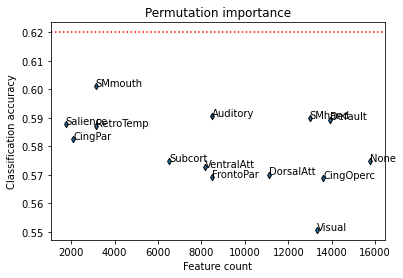

In [41]:
fig, ax = plt.subplots()
plt.scatter(num_feat,net_scores, 20, marker='d', edgecolor='black')
for i, txt in enumerate(list(netlist)):
        ax.annotate(txt, (num_feat[i], net_scores[i]))   
        
plt.title("Permutation importance")
ax.set_ylabel('Classification accuracy')
ax.set_xlabel('Feature count')

ax.axhline(y=.62, color = 'r', linestyle = ':')